# **Tugas Besar Machine Learning**
## Bagja 9102 Kurniawan <br> **1301194020** <br> IF-43-08

## Prepatarory Work

import datasets

In [1]:
#train
!gdown --id 1nMR9FkZvhfatsvlsNGrNtofzAOr-z_zV
#train csv
!gdown --id 1Wt8MvyGufcfiqef9-wZNEiGoG5QIqS46
#test
!gdown --id 1I9vsGduMs8XXKgmMp9tc71WAg136cRAv
#test csv
!gdown --id 1-y0vWh6mV-oiZI5AuSNEv4W1dmq71H9v

Downloading...
From: https://drive.google.com/uc?id=1nMR9FkZvhfatsvlsNGrNtofzAOr-z_zV
To: /content/kendaraan_train.xlsx
100% 25.7M/25.7M [00:01<00:00, 18.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Wt8MvyGufcfiqef9-wZNEiGoG5QIqS46
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I9vsGduMs8XXKgmMp9tc71WAg136cRAv
To: /content/kendaraan_test.xlsx
100% 3.88M/3.88M [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-y0vWh6mV-oiZI5AuSNEv4W1dmq71H9v
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 72.5MB/s]


import libraries

In [2]:
import pandas as pd

import random
import math
import numpy as np
from scipy import sparse

import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import random as random
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, classification_report

### Load Dataset

In [3]:
data = pd.read_csv('kendaraan_train.csv').drop('id', axis=1)
data.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
len(data)

285831

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [6]:
data.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Exploratory Data Analyst (EDA)

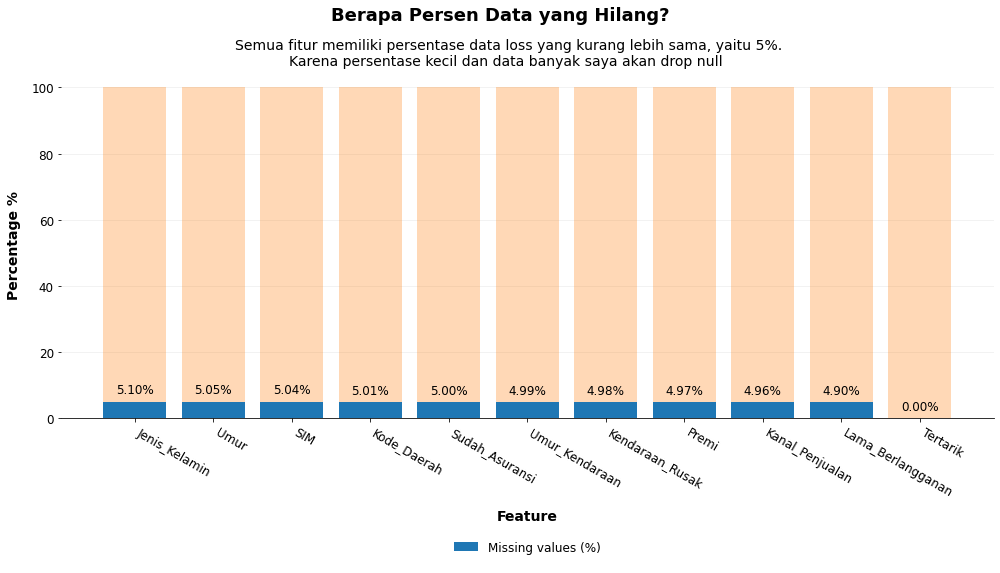

In [7]:
train_null = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
train_notnull = (data.notnull().sum() / len(data) * 100).sort_values()

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x=train_null.index, height=train_null.values)
bars2 = ax.bar(x=train_notnull.index, height=train_notnull.values, bottom=train_null.values, alpha=0.3)

for bar in bars1: 
    height = bar.get_height()
    x = bar.get_x()
    
    ax.text(
        x=x+0.4, y=height + 2.5,
        ha='center',
        s="{:.2f}%".format(height),
        fontsize=12,
    )

ax.legend(["Missing values (%)"], loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("Feature", fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel("Percentage %", fontsize=14, labelpad=10, fontweight='bold')
ax.set_xticklabels(data.columns, rotation=-30, ha='left')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.suptitle("Berapa Persen Data yang Hilang?", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold')
plt.title("Semua fitur memiliki persentase data loss yang kurang lebih sama, yaitu 5%.\nKarena persentase kecil dan data banyak saya akan drop null ", loc='center', ha='center', x=0.48, y=1, fontsize=14)
plt.tight_layout()
plt.show()

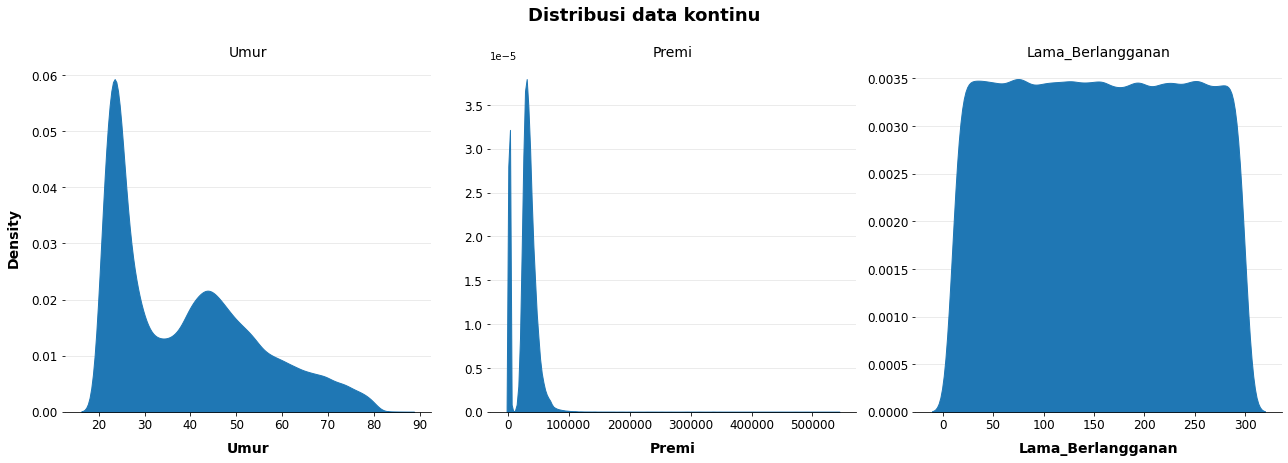

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(data=data, x="Umur", ax=ax[0], shade=True, alpha=1)
sns.kdeplot(data=data, x="Premi", ax=ax[1], shade=True, alpha=1)
sns.kdeplot(data=data, x="Lama_Berlangganan", ax=ax[2], shade=True, alpha=1)

col = ["Umur", "Premi", "Lama_Berlangganan"]
for i in range(3) : 
    ax[i].grid(axis='y', alpha=0.3)
    ax[i].set_axisbelow(True)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_title(col[i], fontsize=14)
    ax[i].tick_params(labelsize=12)
    ax[i].set_xlabel(col[i], fontsize=14, labelpad=10, fontweight='bold')
    ax[i].set_ylabel(None)

ax[0].set_ylabel("Density", fontsize=14, labelpad=10, fontweight='bold')

  
plt.suptitle("Distribusi data kontinu\n", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


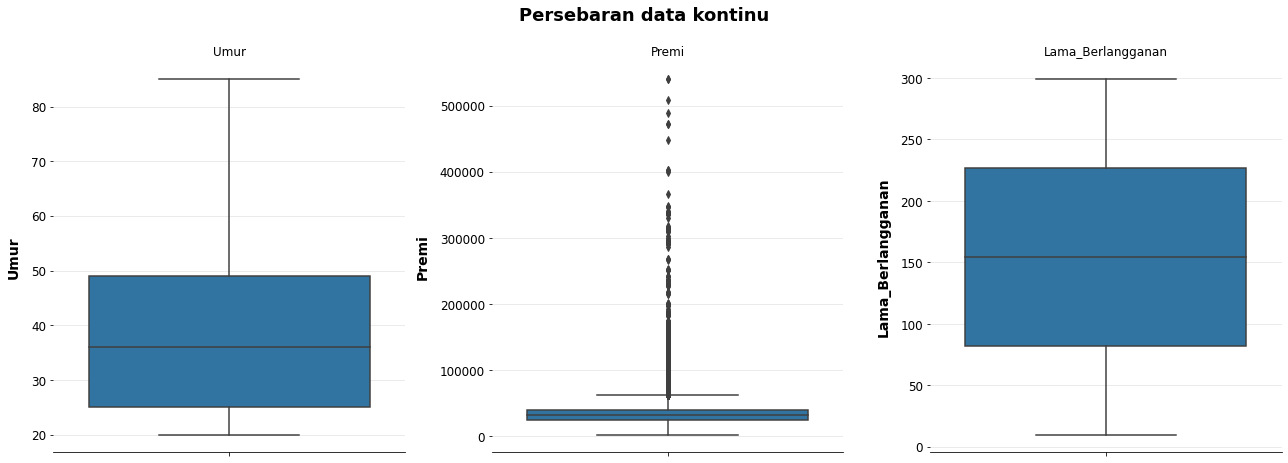

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=data, y="Umur", ax=ax[0])
sns.boxplot(data=data, y="Premi", ax=ax[1])
sns.boxplot(data=data, y="Lama_Berlangganan", ax=ax[2])

col = ["Umur", "Premi", "Lama_Berlangganan"]
for i in range(3) : 
    ax[i].grid(axis='y', alpha=0.3)
    ax[i].set_axisbelow(True)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_title(col[i])
    ax[i].tick_params(labelsize=12)
    ax[i].set_ylabel(col[i], fontsize=14, labelpad=10, fontweight='bold')


plt.suptitle("Persebaran data kontinu\n", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

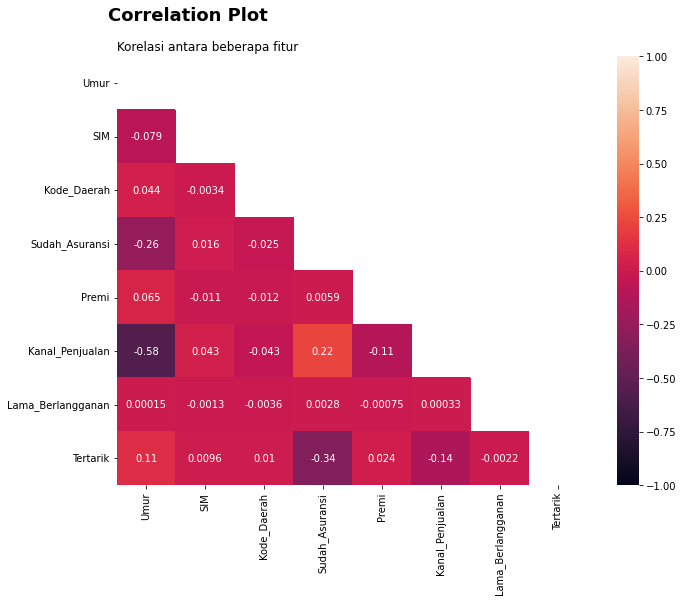

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=18, fontweight='bold')
plt.title("Korelasi antara beberapa fitur", loc='left', fontsize=12)  
plt.tight_layout()
plt.show()

## Data Preprocess

length of original data

In [11]:
len(data)

285831

length data after dropna

In [12]:
data = data.dropna(how="any")
len(data)

171068

### Outlier Handling

In [13]:
# Handling outlier di premi
Q1 = data.Premi.quantile(0.25)
Q3 = data.Premi.quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

data.loc[data['Premi'] > UB, "Premi"] = UB
data.loc[data['Premi'] < LB, "Premi"] = LB

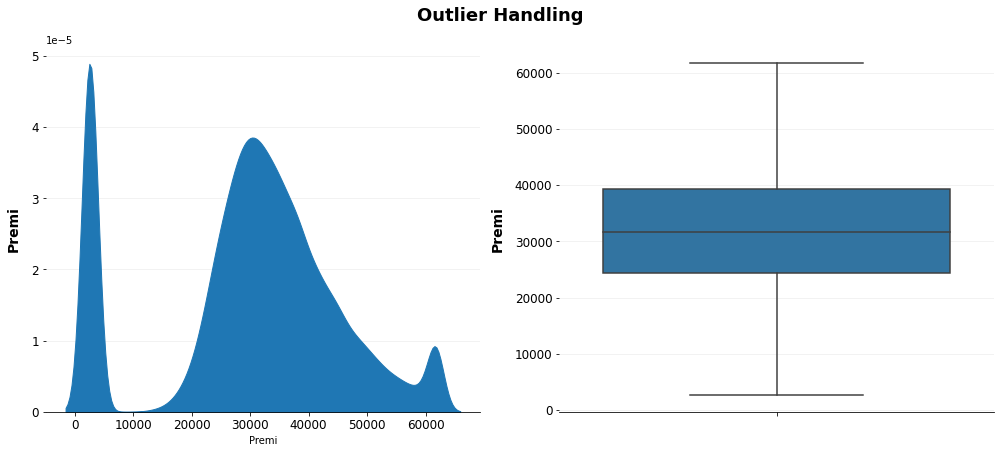

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) 

sns.kdeplot(data=data, x="Premi", ax=ax[0], shade=True, alpha=1)
sns.boxplot(data=data, y=data.Premi, ax=ax[1])


ax[0].grid(axis='y', alpha=0.2)
ax[0].set_axisbelow(True)
ax[0].tick_params(labelsize=12)
ax[0].set_ylabel("Premi", fontsize=14, labelpad=10, fontweight='bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)


ax[1].grid(axis='y', alpha=0.2)
ax[1].set_axisbelow(True)
ax[1].tick_params(labelsize=12)
ax[1].set_ylabel("Premi", fontsize=14, labelpad=10, fontweight='bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)

plt.suptitle("Outlier Handling", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Encoding and Normalization

OneHotEncoding for non ordinal feature

In [15]:
jk_dum = pd.get_dummies(data.Jenis_Kelamin, prefix="jk")
data = pd.concat([data, jk_dum], axis=1)

sim_dum = pd.get_dummies(data.SIM, prefix="sim")
data = pd.concat([data, sim_dum], axis=1)

rusak_dum = pd.get_dummies(data.Kendaraan_Rusak, prefix="rusak")
data = pd.concat([data, rusak_dum], axis=1)

asuransi_dum = pd.get_dummies(data.Sudah_Asuransi, prefix="asuransi")
data = pd.concat([data, asuransi_dum], axis=1)

kd_dum = pd.get_dummies(data.Kode_Daerah, prefix="kd")
data = pd.concat([data, kd_dum], axis=1)

data.drop(['Jenis_Kelamin', 'SIM', 'Kendaraan_Rusak', 'Sudah_Asuransi', 'Kode_Daerah', 'Kanal_Penjualan', 'Tertarik'], axis=1, inplace=True)

min max scaling for continu data

In [16]:
def minMaxScaling(df) :
    return (df - df.min()) / (df.max() - df.min())
    
data['Umur'] = minMaxScaling(data['Umur'])
data['Premi'] = minMaxScaling(data['Premi'])
data['Lama_Berlangganan'] = minMaxScaling(data['Lama_Berlangganan'])

categorical encode

In [17]:
uk_map = {
    "< 1 Tahun" : 1, 
    "1-2 Tahun" : 2, 
    "> 2 Tahun" : 3 
}

data = data.replace({"Umur_Kendaraan" : uk_map})

In [18]:
data.corr()

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jk_Pria,jk_Wanita,sim_0.0,sim_1.0,rusak_Pernah,rusak_Tidak,asuransi_0.0,asuransi_1.0,kd_0.0,kd_1.0,kd_2.0,kd_3.0,kd_4.0,kd_5.0,kd_6.0,kd_7.0,kd_8.0,kd_9.0,kd_10.0,kd_11.0,kd_12.0,kd_13.0,kd_14.0,kd_15.0,kd_16.0,kd_17.0,kd_18.0,kd_19.0,kd_20.0,kd_21.0,kd_22.0,kd_23.0,kd_24.0,kd_25.0,kd_26.0,kd_27.0,kd_28.0,kd_29.0,kd_30.0,kd_31.0,kd_32.0,kd_33.0,kd_34.0,kd_35.0,kd_36.0,kd_37.0,kd_38.0,kd_39.0,kd_40.0,kd_41.0,kd_42.0,kd_43.0,kd_44.0,kd_45.0,kd_46.0,kd_47.0,kd_48.0,kd_49.0,kd_50.0,kd_51.0,kd_52.0
Umur,1.000000,0.766604,0.062842,-0.001032,0.145438,-0.145438,0.078543,-0.078543,0.269755,-0.269755,0.256815,-0.256815,0.043541,0.020472,-0.053314,-0.020255,0.001865,-0.019473,-0.072109,0.007584,-0.006457,-0.022543,-0.059393,-0.043791,-0.029072,-0.049985,-0.033799,-0.074714,-0.036004,-0.024073,-0.013320,0.013380,0.036963,-0.046988,-0.019079,-0.002082,0.008090,-0.042880,-0.009808,-0.050705,0.297827,-0.030361,-0.081449,0.025136,-0.048713,-0.010753,-0.024526,-0.022849,-0.075616,-0.048556,0.027485,0.010673,-0.012675,-0.034690,-0.007903,-0.000347,-0.024676,-0.029984,-0.026827,-0.036358,0.084467,-0.030800,-0.012306,0.007453,0.011910
Umur_Kendaraan,0.766604,1.000000,0.035725,-0.002030,0.160203,-0.160203,0.036660,-0.036660,0.398799,-0.398799,0.382045,-0.382045,0.053304,0.023533,-0.056050,-0.019469,0.009890,-0.016263,-0.081087,0.009747,-0.013722,-0.023627,-0.067146,-0.048706,-0.028626,-0.050682,-0.039023,-0.081752,-0.040707,-0.027123,-0.015965,0.016830,0.037982,-0.058627,-0.020510,0.000125,0.005768,-0.047031,-0.013234,-0.055034,0.335119,-0.032639,-0.087530,0.020817,-0.053643,-0.017095,-0.026882,-0.023175,-0.076965,-0.056486,0.032743,0.012772,-0.010711,-0.040735,-0.008097,-0.002271,-0.029093,-0.026343,-0.027878,-0.038028,0.079311,-0.034447,-0.026335,0.006887,0.008219
Premi,0.062842,0.035725,1.000000,0.000316,0.003052,-0.003052,0.013046,-0.013046,0.007171,-0.007171,-0.006091,0.006091,-0.131314,-0.089708,-0.022540,-0.060656,-0.031349,-0.024949,-0.042035,-0.031827,0.118010,-0.009137,-0.032843,-0.026295,-0.040809,-0.036029,-0.032083,-0.009328,-0.033009,0.001417,-0.026790,-0.011877,-0.125842,-0.033946,-0.020876,-0.030786,-0.023306,-0.022573,-0.004338,-0.039228,0.302024,-0.009541,-0.054865,-0.129871,-0.033964,-0.019196,-0.016749,-0.030096,-0.008234,-0.015910,-0.033062,-0.026044,-0.017077,0.008471,-0.013302,-0.021917,-0.015062,-0.040320,-0.045312,-0.001226,-0.200309,-0.030556,0.007677,-0.007771,-0.000839
Lama_Berlangganan,-0.001032,-0.002030,0.000316,1.000000,-0.002175,0.002175,-0.001739,0.001739,-0.002023,0.002023,-0.002902,0.002902,0.000708,-0.000068,-0.002660,0.000606,-0.001482,0.002424,0.001380,-0.004022,0.007033,-0.000632,0.001488,0.001182,-0.000792,0.003361,-0.001293,0.001580,0.003050,0.000147,0.003094,-0.000617,-0.002188,0.001701,-0.000631,-0.005341,-0.000157,-0.003858,-0.000342,-0.002118,-0.001443,-0.004128,-0.003662,0.005552,0.000388,0.000945,0.001899,-0.001910,-0.003599,-0.002417,-0.002291,0.000301,0.001133,0.000568,0.000537,0.001727,0.003910,0.000626,0.000076,-0.001080,0.000413,0.005951,-0.003046,-0.000649,0.001345
jk_Pria,0.145438,0.160203,0.003052,-0.002175,1.000000,-1.000000,0.018742,-0.018742,0.092064,-0.092064,0.082809,-0.082809,0.016219,0.004295,-0.009564,0.002979,0.003904,-0.003805,-0.012728,0.007483,0.015620,-0.008881,-0.018155,-0.012063,0.000394,-0.004074,-0.004126,-0.016779,-0.015592,0.001219,-0.000797,0.002626,0.007849,-0.014733,0.000767,0.005471,-0.001468,-0.009496,-0.007658,-0.013477,0.029704,0.002735,-0.013593,0.009905,-0.010574,-0.001974,-0.005705,0.001679,-0.013942,-0.016151,0.014947,0.007153,0.004934,-0.005705,0.002370,0.010069,-0.003446,-0.009288,0.001273,-0.003226,0.016044,-0.007279,-0.003710,0.005734,0.009756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kd_48.0,0.08

In [19]:
data

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jk_Pria,jk_Wanita,sim_0.0,sim_1.0,rusak_Pernah,rusak_Tidak,asuransi_0.0,asuransi_1.0,kd_0.0,kd_1.0,kd_2.0,kd_3.0,kd_4.0,kd_5.0,kd_6.0,kd_7.0,kd_8.0,kd_9.0,kd_10.0,kd_11.0,kd_12.0,kd_13.0,kd_14.0,kd_15.0,kd_16.0,kd_17.0,kd_18.0,kd_19.0,kd_20.0,kd_21.0,kd_22.0,kd_23.0,kd_24.0,kd_25.0,kd_26.0,kd_27.0,kd_28.0,kd_29.0,kd_30.0,kd_31.0,kd_32.0,kd_33.0,kd_34.0,kd_35.0,kd_36.0,kd_37.0,kd_38.0,kd_39.0,kd_40.0,kd_41.0,kd_42.0,kd_43.0,kd_44.0,kd_45.0,kd_46.0,kd_47.0,kd_48.0,kd_49.0,kd_50.0,kd_51.0,kd_52.0
0,0.153846,1,0.429592,0.301038,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.430769,3,0.391892,0.512111,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.584615,2,0.000000,0.183391,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0.015385,1,0.340051,0.557093,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0.000000,1,0.476223,0.072664,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285826,0.046154,1,0.395071,0.716263,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
285827,0.015385,1,0.711325,0.138408,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
285828,0.046154,1,0.796993,0.747405,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
285829,0.738462,2,0.471437,0.899654,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## KMeans Modelling

main algorithm for kmeans

In [20]:
class KMeans() : 
    def __init__(self, k, max_iter, verbose=False) : 
        self.k = k
        self.max_iter = max_iter
        self.verbose = verbose
        
    def _init_centroids(self, X) :
        # length of dataset
        n = len(X) 

        # choose random to become first centroid
        init_idx = np.random.randint(0, n, self.k)
        centroid = X[init_idx]

        return centroid

    def euclidean(self, x1, x2) : 
        # self explanatory
        return np.sqrt(np.sum((x2-x1)**2, axis=1))

    def fit_predict(self, X) :

        # change to numpy, too make it fast
        X = X.to_numpy()

        n_data = X.shape[0]

        # init random centroid
        centroids = self._init_centroids(X)
        
        # label buffer
        labels = np.full(n_data, -1)

        for iteration in range(self.max_iter):

            # init empty clusters
            clusters = [[] for i in range(self.k)]

            # save previous iter centroid, used for stop criteria
            old_centroid = np.copy(centroids)

            # inertia, later will be sum of squared distance to nearest centroid
            inertia = 0

            # loop through dataset
            for i, data_point in enumerate(X) : 

                # calculate one data point to k-centroid
                dist = self.euclidean(data_point, centroids) 

                # get cluster with the minimum distance
                cluster = np.argmin(dist)
                
                # inertia sum
                inertia += dist[cluster]**2

                # assign data point into specified cluster
                clusters[cluster].append(data_point)
                
                # label for each data point
                labels[i] = cluster
            
            # loop through centroids
            for i in range(self.k) :

                # re-new centroid with mean of cluster 
                centroids[i] = np.mean(np.array(clusters[i]), axis=0)

            if self.verbose: 
                print(f" Iteration {iteration+1}, inertia {inertia}")    

            # stopping criteria, if previous centroid is the same as new
            # then  stop
            isSame = old_centroid == centroids
            if isSame.all() : 
                break


        # attribute
        self.labels = labels
        self.clusters = clusters
        self.inertia = inertia
        
        return labels, clusters

set k value using what we get from elbow method

In [21]:
kmeans = KMeans(
    k=2, 
    max_iter=100, 
    verbose=True
)
test, clusters = kmeans.fit_predict(data)

 Iteration 1, inertia 913731.407042468
 Iteration 2, inertia 485919.66785390984
 Iteration 3, inertia 423612.55945629324
 Iteration 4, inertia 345482.83627596067
 Iteration 5, inertia 343574.28724995215
 Iteration 6, inertia 343572.7186961707
 Iteration 7, inertia 343572.715960093


dimention reduction

In [22]:
data["Cluster"] = test

In [23]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.drop("Cluster", axis=1))

### Results

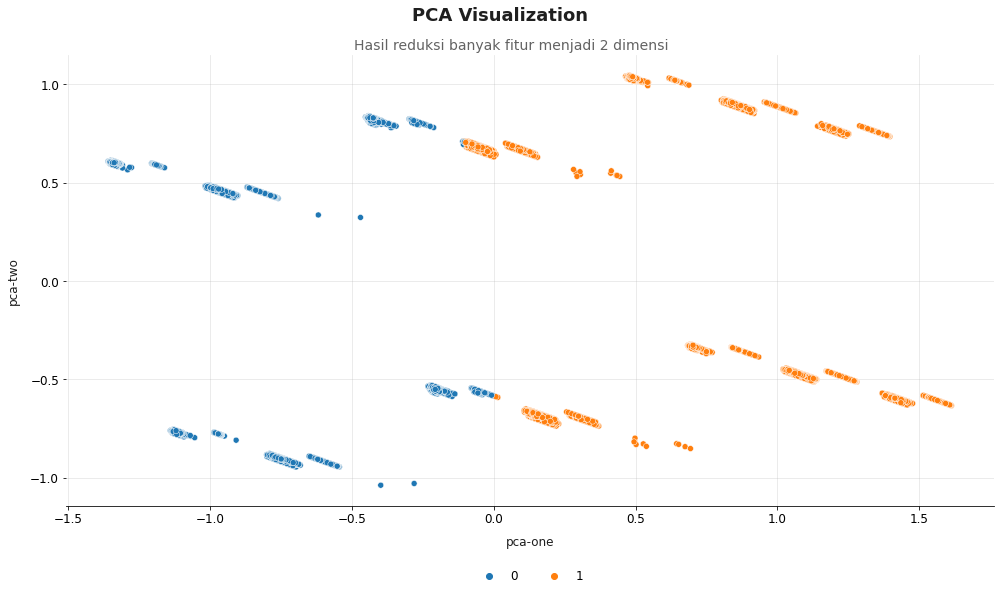

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=test)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("pca-one", fontsize=12, labelpad=10, color="#1F1F1F")
ax.set_ylabel("pca-two", fontsize=12, labelpad=10, color="#1F1F1F")

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.suptitle("PCA Visualization", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold', color="#1F1F1F")
plt.title("Hasil reduksi banyak fitur menjadi 2 dimensi", loc='center', ha='center', x=0.48, y=1, fontsize=14, color='#636363')
plt.tight_layout()
plt.savefig("kmeans-pca")
plt.show()

## Elbow Method

In [25]:
res_inertia = []
res_x = []
for k in range(1, 10) : 
    print(f'K-{k}')
    kmeans = KMeans(k, 100, verbose=True)
    kmeans.fit_predict(data)
    print()
    
    res_inertia.append(kmeans.inertia)
    res_x.append(k)

K-1
 Iteration 1, inertia 1090772.2611141237
 Iteration 2, inertia 543924.9627999672

K-2
 Iteration 1, inertia 698036.0482541398
 Iteration 2, inertia 344452.2139270661
 Iteration 3, inertia 343572.715960093

K-3
 Iteration 1, inertia 540605.6230535109
 Iteration 2, inertia 339956.0385642215
 Iteration 3, inertia 337192.73870386835
 Iteration 4, inertia 330013.18211842433
 Iteration 5, inertia 304158.5992648061
 Iteration 6, inertia 299612.451590252

K-4
 Iteration 1, inertia 586867.5260089764
 Iteration 2, inertia 324365.79007518257
 Iteration 3, inertia 306457.4587717352
 Iteration 4, inertia 302233.37986023567
 Iteration 5, inertia 302168.58336593123
 Iteration 6, inertia 301987.37467083323
 Iteration 7, inertia 300042.5863431601
 Iteration 8, inertia 296947.96622730716
 Iteration 9, inertia 296690.60355611326
 Iteration 10, inertia 295050.9984677522
 Iteration 11, inertia 290413.5416320515
 Iteration 12, inertia 290343.62279211014

K-5
 Iteration 1, inertia 637121.8270792302
 Iter

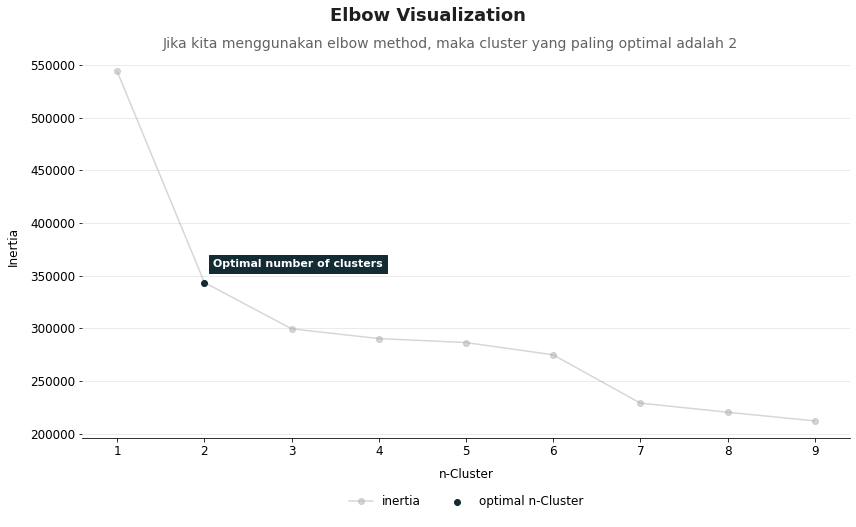

In [26]:
fig, ax = plt.subplots(figsize=(12, 7))

x = [i for i in range(1, 10)]

ax.scatter(x[1], res_inertia[1], color="#132C33", zorder=10)
ax.plot(x, res_inertia, marker='o', color='#AEAEAE', alpha=0.5, zorder=0)


ax.legend(["inertia", "optimal n-Cluster"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12 )
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("n-Cluster", fontsize=12, labelpad=10)
ax.set_ylabel("Inertia", fontsize=12, labelpad=10)

ax.text(
    s="Optimal number of clusters", 
    x=2.1, y=res_inertia[1] + 15000,
    fontsize=11,
    color='white',
    fontweight='bold',
    backgroundcolor="#132C33"    
)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.suptitle("Elbow Visualization", ha='center', va='center', x=0.5, y=1.02, fontsize=18, fontweight='bold', color="#1F1F1F")
plt.title("Jika kita menggunakan elbow method, maka cluster yang paling optimal adalah 2", loc='center', ha='center', x=0.48, y=1, fontsize=14, color='#636363')
plt.tight_layout()
plt.show()